In [6]:
from src.download_dataset.download import *

df = create_df_dataset_MIAS()
#%

error: nothing to repeat at position 0

In [16]:
df["abn_class"].unique()

array(['B', None, 'M'], dtype=object)

In [17]:
df["abn_class"] = df['abn_class'].replace(['B'],'T')
df["abn_class"] = df['abn_class'].replace(['M'],'T')
df["abn_class"] = df['abn_class'].replace([None],'N')
df.head()

,name_file,cjf,meta_class,abn_class,x_abn,y_abn,radio
0,mdb002,G,CIRC,T,522,280,69.0
1,mdb003,D,NORM,N,None,None,NaN
2,mdb004,D,NORM,N,None,None,NaN
3,mdb005,F,CIRC,T,477,133,30.0
4,mdb005,F,CIRC,T,500,168,26.0


In [18]:
from src.models.CNN import create_basic_cnn_model
model = create_basic_cnn_model(2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               3097700   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
names_files = df["name_file"]
type(names_files)

pandas.core.series.Series

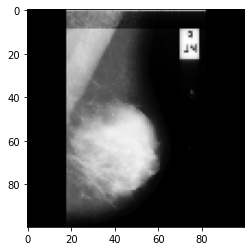

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np #print(np.unique(img)) [0-255]

path ="data/dataset_raw/MIAS/"
for name in names_files:
    img = cv2.imread(path + name +".pgm",cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(100,100))
    plt.imshow(img, cmap="gray")
    break

In [22]:
x = []
# y =  []
for name in names_files:
    img = cv2.imread(path + name +".pgm",cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(100,100))
    img = img.reshape(100,100,1)
    x.append(img)
#     print(img)
#     print(img.shape)
#     break

In [23]:
x = np.array(x).astype(float) / 255
x.shape

(329, 100, 100, 1)

In [24]:
# https://stackoverflow.com/questions/17702272/convert-pandas-series-containing-string-to-boolean
d = {'T': 1, 'N': 0}
y = df["abn_class"].map(d)
y = y.to_numpy()
y

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
y.shape

(329,)

In [26]:
!pip install jupyter-tensorboard

In [27]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4622444028505038430
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2911292622
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10017561588442507966
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [28]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [29]:
from tensorflow.keras.callbacks import TensorBoard
tensorboardDenso = TensorBoard(log_dir = 'logs/cnn')
# https://www.tensorflow.org/guide/gpu#manual_device_placement
with tf.device('/GPU:0'):
    model.fit(x,y,
              batch_size = 32,
              validation_split=0.2,
              epochs=100,
              callbacks=[tensorboardDenso])

Epoch 1/100
9/9 [==============================] - 5s 201ms/step - loss: 0.7472 - accuracy: 0.4943 - val_loss: 0.6933 - val_accuracy: 0.5303
Epoch 2/100
9/9 [==============================] - 0s 34ms/step - loss: 0.6878 - accuracy: 0.5817 - val_loss: 0.5773 - val_accuracy: 0.8485
Epoch 3/100
9/9 [==============================] - 0s 30ms/step - loss: 0.6690 - accuracy: 0.5779 - val_loss: 0.6554 - val_accuracy: 0.6364
Epoch 4/100
9/9 [==============================] - 0s 29ms/step - loss: 0.6457 - accuracy: 0.6654 - val_loss: 0.5325 - val_accuracy: 0.8182
Epoch 5/100
9/9 [==============================] - 0s 29ms/step - loss: 0.6316 - accuracy: 0.6502 - val_loss: 0.6978 - val_accuracy: 0.5455
Epoch 6/100
9/9 [==============================] - 0s 31ms/step - loss: 0.5869 - accuracy: 0.7262 - val_loss: 0.5947 - val_accuracy: 0.7424
Epoch 7/100
9/9 [==============================] - 0s 28ms/step - loss: 0.5430 - accuracy: 0.7338 - val_loss: 0.7323 - val_accuracy: 0.5606
Epoch 8/100
9/9 [==

In [ ]:
# https://www.dlology.com/blog/how-to-run-tensorboard-in-jupyter-notebook/

In [1]:
%load_ext tensorboard

In [ ]:
# https://stackoverflow.com/questions/56036922/how-to-kill-tensorboard-with-tensorflow2-jupyter-win

In [4]:
%tensorboard --logdir logs

In [30]:
df["abn_class"].astype("string").value_counts()

N    207
T    122
Name: abn_class, dtype: Int64